#### Blocking method for robust estimations

In [205]:
# imports
from typing import List

import numpy as np
import matplotlib.pyplot as plt     

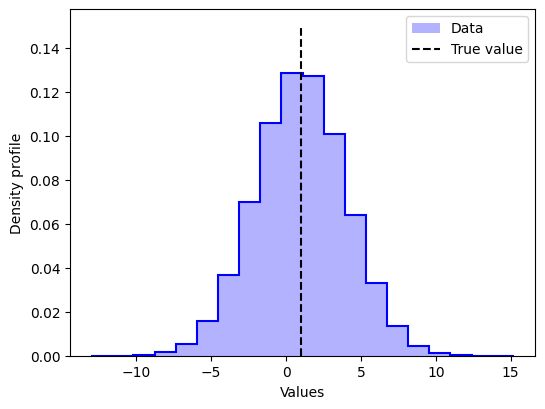

In [361]:
# set number of experiments, number of blocks
N = 500000
nblocks = 100
x = np.arange(1, nblocks+1, 1)

# generate corrupted data
# they should be only ones
data = np.random.normal(1, 3, N)

plt.figure(figsize=(6, 6*6/8))
plt.hist(data, bins=20, density=True, color="blue", histtype="step", lw=1.5)
plt.hist(data, bins=20, density=True, color="blue", alpha=0.3, histtype="stepfilled", label="Data")
plt.vlines(1, 0, 0.15, label="True value", color="black", lw=1.5, ls="--")
plt.legend()
plt.xlabel("Values")
plt.ylabel("Density profile")
plt.show()

In [362]:
# blocking method
def blocking(experiments: List[float], nblocks: int):
    """
    Blocking method to compute the statistical uncertainty of the MC simulation.
    
    Args:
        experiments (List[float]): list of the experiments results.
    """

    if (len(experiments)%nblocks != 0):
        raise ValueError(f"Number of experiments has to be a multiple of nblocks. Here {len(experiments)} is not multiple of {nblocks}.")

    block_size = int(len(experiments) / nblocks)

    ave, est, err = [], [], []
    
    for b in range(nblocks):
        block_data = experiments[b*block_size: (b+1)*block_size]
        ave.append(np.mean(block_data))
        est.append(np.mean(ave))
        err.append(np.std(est))

    return est, err

In [363]:
est, err = blocking(data, nblocks)

Text(0, 0.5, 'Estimation')

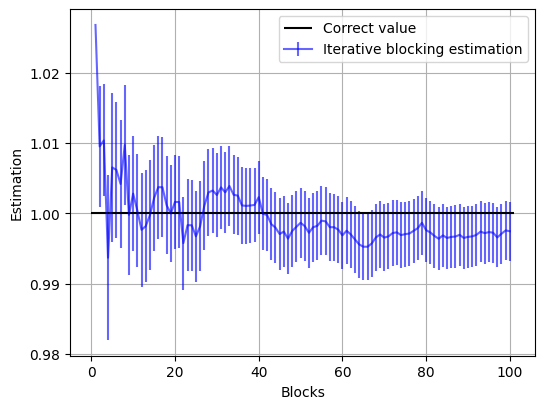

In [364]:
plt.figure(figsize=(6, 6*6/8))
plt.errorbar(x, est, yerr=err, label="Iterative blocking estimation", color="blue", alpha=0.6)
plt.hlines(1, 0, nblocks+1, color="black", label="Correct value")
plt.legend()
plt.grid(True)
plt.xlabel("Blocks")
plt.ylabel("Estimation")

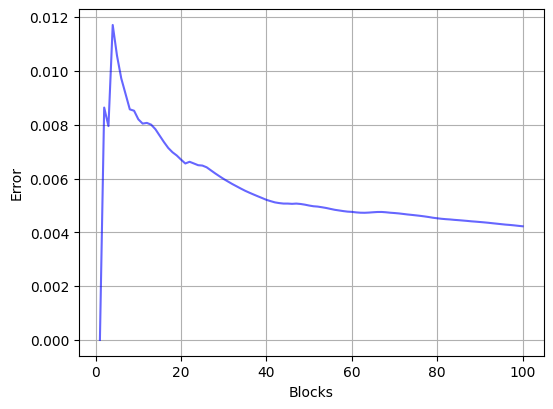

In [365]:
# let's have a look to the error plot
plt.figure(figsize=(6, 6*6/8))
plt.plot(x, err, color="blue", alpha=0.6, lw=1.5)
plt.xlabel("Blocks")
plt.ylabel("Error")
plt.grid()
plt.show()